In [ ]:
from ase.build import bulk
from pyiron_workflow_atomistics.dataclass_storage import CalcInputMinimize
from pyiron_workflow_atomistics.bulk import optimise_cubic_lattice_parameter
from pyiron_workflow_lammps.engine import LammpsEngine
from pyiron_workflow import Workflow
import os

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Example for LAMMPS engine

In [ ]:
inp = CalcInputMinimize()
inp.relax_cell = False

Engine = LammpsEngine(EngineInput = inp)
Engine.working_directory = "test_opt_cubic_cell"
# Adjust this line to match your LAMMPS installation
# If you are using conda-lammps or a LAMMPS binary on your system, you can use directly:
Engine.command = "lmp -in in.lmp -log minimize.log"
Engine.lammps_log_filepath = "minimize.log"
Engine.input_script_pair_style = "eam/fs"
Engine.path_to_model = os.getcwd() + "/Al-Fe.eam.fs"

# /root/github_dev/pyiron_workflow_atomistics/pyiron_workflow_atomistics
structure = bulk("Fe", a=2.828, cubic=True)
wf1 = Workflow(Engine.working_directory, delete_existing_savefiles=True)
wf1.opt_cubic_cell = optimise_cubic_lattice_parameter(
    structure=structure,
    name="Fe",
    crystalstructure="bcc",
    calculation_engine=Engine,
    parent_working_directory="opt_cubic_cell",
    rattle=0.1,
    strain_range=(-0.02, 0.02),
    num_points=6,
    eos_type="birchmurnaghan",
)
# Any eos_type supported by ase.eos.EquationOfState can be used,
# e.g. sjeos, taylor, murnaghan, birch, birchmurnaghan, pouriertarantola, vinet, antonschmidt, p3

wf1.run()


current mode  minimize


{'opt_cubic_cell__equil_struct': Atoms(symbols='Fe2', pbc=True, cell=[2.8554036006730863, 2.8554036006730863, 2.8554036006730863], initial_magmoms=...),
 'opt_cubic_cell__a0': np.float64(2.8554036006730863),
 'opt_cubic_cell__B': np.float64(178.2689296133779),
 'opt_cubic_cell__equil_energy_per_atom': np.float64(-4.012989682254272),
 'opt_cubic_cell__equil_volume_per_atom': np.float64(11.640523523888817),
 'opt_cubic_cell__volumes': [np.float64(21.287097162601995),
  np.float64(21.81268105404494),
  np.float64(22.346845717919777),
  np.float64(22.889660634165235),
  np.float64(23.441195282719992),
  np.float64(24.001519143522813)],
 'opt_cubic_cell__structures': [Atoms(symbols='Fe2', pbc=True, cell=[[2.77144, 1.6970175625144705e-16, 1.6970175625144705e-16], [0.0, 2.77144, 1.6970175625144705e-16], [0.0, 0.0, 2.77144]]),
  Atoms(symbols='Fe2', pbc=True, cell=[[2.794064, 1.7108707671064253e-16, 1.7108707671064253e-16], [0.0, 2.794064, 1.7108707671064253e-16], [0.0, 0.0, 2.794064]]),
  Ato

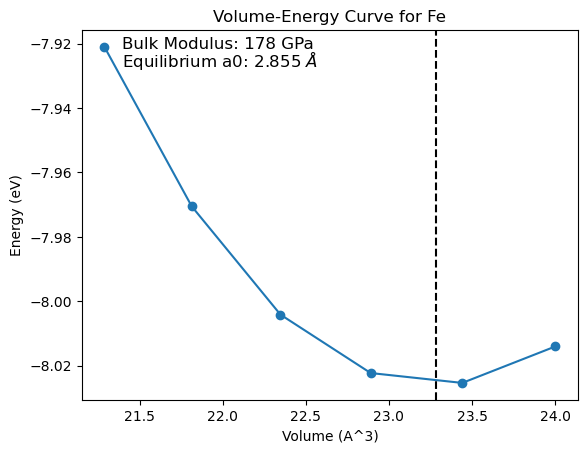

In [9]:
from matplotlib import pyplot as plt

plt.plot(wf1.opt_cubic_cell.outputs.volumes.value ,wf1.opt_cubic_cell.outputs.energies.value, marker="o")
plt.axvline(wf1.opt_cubic_cell.outputs.equil_volume_per_atom.value * len(wf1.opt_cubic_cell.outputs.equil_struct.value), color="k", linestyle="--")
plt.xlabel("Volume (A^3)")
plt.ylabel("Energy (eV)")
plt.title("Volume-Energy Curve for Fe")
plt.text(0.08, 0.95, f"Bulk Modulus: {wf1.opt_cubic_cell.outputs.B.value:.0f} GPa", fontsize=12, transform=plt.gca().transAxes)
plt.text(0.08, 0.90, rf"Equilibrium a0: {wf1.opt_cubic_cell.outputs.a0.value:.3f} $\AA$", fontsize=12, transform=plt.gca().transAxes)
plt.show()